# Computer Infrastructure Assignment 2025 

### Submission by Faolán H
-----

## Modules used throughout the assignment 

Standard python modules are imported first as per good practise guidelines

### Source documentation for the modules:
- datetime (https://docs.python.org/3/library/datetime.html)
- Pandas (https://pandas.pydata.org/docs/)
- Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html)
- yfinance (https://github.com/ranaroussi/yfinance)


In [ ]:
# listing files in a directory
import os

# datetime - formatting date and time date
import datetime as dt

# pandas - generating DataFrames and plotting them
import pandas as pd

# matplotlib.pyplot - having more plotting functionality
import matplotlib.pyplot as plt

# format the datetime of plots
import matplotlib.dates as mdates

# Yahoo Finance API data - the stock data being analysed
import yfinance as yf

-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

### Name the Problem
##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

### Describe the Problem
##### There are several steps that need to be taken to solve the problem:
- Bring in the data
- Format it in the correct way
- Create a csv of the data, which is to be placed in a data folder

### Solve the Problem

#### yfinance download documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

##### The abbreviated name of the relevant stock names has been provided. To find these abbreviated names, you can search on the official yahoo finance website (https://finance.yahoo.com/)

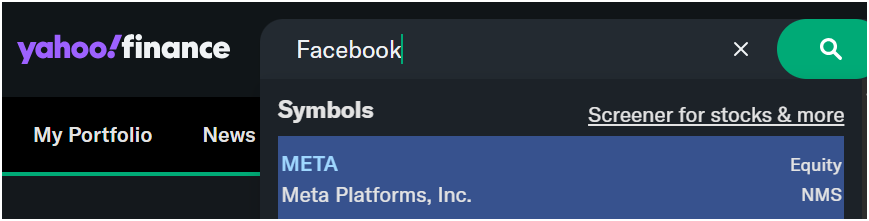

In [ ]:
# Setting the DataFrame. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
df.head(3)# Show the first three rows of the DataFrame to check column names and data structure.

In [ ]:
# Looking at the dataframe index to ensure there are 60m intervals
df.index

#### Now to output the results as defined in the dataframe into comma separated values using datetime
#### Source datetime.today(): https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [ ]:
# The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

#### Source strftime: https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [ ]:
# This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

#### Source Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

### Name the Problem
##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

### Describe the Problem
- I need to call the latest data file (today's one) from the 'data' folder
- I need to plot all five closing prices in a well-formatted plot
- I nned to save the plot into the 'plots' folder with a datetime formatted name

### Solve the Problem

In [ ]:
# See the column headings to understand which data I need
df.columns

##### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
##### Saving figures: Stack overflow (https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it)

##### Xaxis Datetime format Source: https://www.pythontutorials.net/blog/format-x-axis-on-chart-created-with-pandas-plot-method/#step-by-step-x-axis-formatting

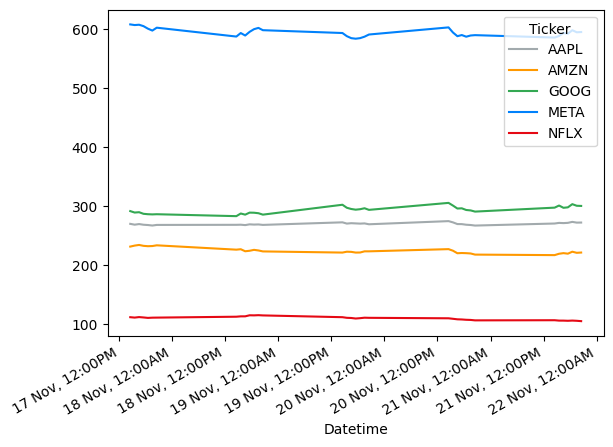

In [50]:
# Adding more functionality to the plot using fig,ax
fig, ax = plt.subplots()
# Using the company colours in the plot
colours = ('#A2AAAD', '#FF9900', '#34A853', '#0081FB', '#E50914')

date_formatter = mdates.DateFormatter('%d %b, %I:%M%p')  # %b = abbreviated month, %Y = 4-digit year
ax.xaxis.set_major_formatter(date_formatter)

# ploting all closing prices in the DataFrame
df['Close'].plot(color=colours, ax=ax);

# The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

# This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

# This brings together the data and format name into a folder specifically created for the outputs
plotname = "plots/" + "faangdata_" + today_format + ".webp"

# Save the figure into the plot folder as a webp which displays a higher quality image digitally with lower storage
fig.savefig(plotname, dpi = 500)

In [ ]:
# date.max 
# https://docs.python.org/3/library/datetime.html
data = open('data/faangdata_2025.11.02_17.06.55.csv')
data

In [ ]:
# https://stackoverflow.com/questions/75539438/get-a-dataframe-from-a-python-notebook-ipynb-to-another
plotdata = pd.read_csv('data/faangdata_2025.11.02_17.06.55.csv')

-----
## Problem 3: Script
##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

-----
## Problem 4: Automation
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

-----
# END
-----